<div style="background-color: #CD5C5C; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Sports Data Analysis: Problem Statement 2
</h1>
</div>

In [7]:
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [8]:
#Importing the cleaned dataset after the first task
import pandas as pd
df=pd.read_csv('Sports Dataset1.csv')

In [9]:
#Analyzing player positions
position_counts = df['Position'].value_counts()

#Highest Position
max_position = position_counts.idxmax()
max_count = position_counts.max()

#Lowest Position
min_position = position_counts.idxmin()
min_count = position_counts.min()

print("Position with the highest number of players:")
print(f"{max_position}: {max_count} players")
print("\nPosition with the lowest number of players:")
print(f"{min_position}: {min_count} players")

Position with the highest number of players:
Goalkeeper: 4398 players

Position with the lowest number of players:
Midfielder: 3962 players


In [10]:
#Determining the distribution of players across positions
from scipy.stats import chi2_contingency

#Counting occurences
observed_counts = df['Position'].value_counts()

#Expected counts assuming a uniform distribution
total_players = observed_counts.sum()
expected_counts = pd.Series(total_players / len(observed_counts), index=observed_counts.index)

#Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency([observed_counts, expected_counts])

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square statistic: 12.823059060327429
P-value: 0.005035302528376228


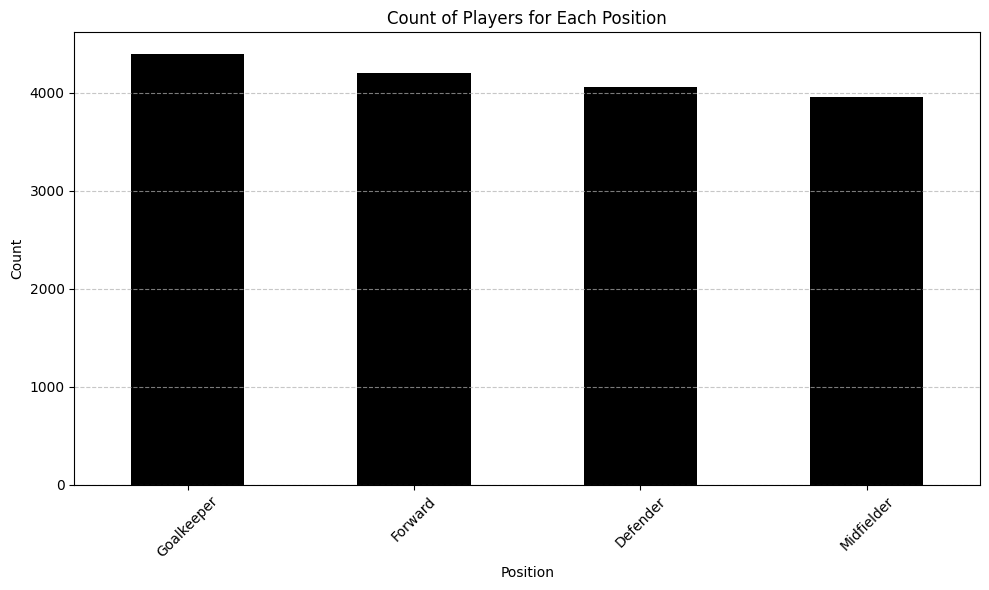

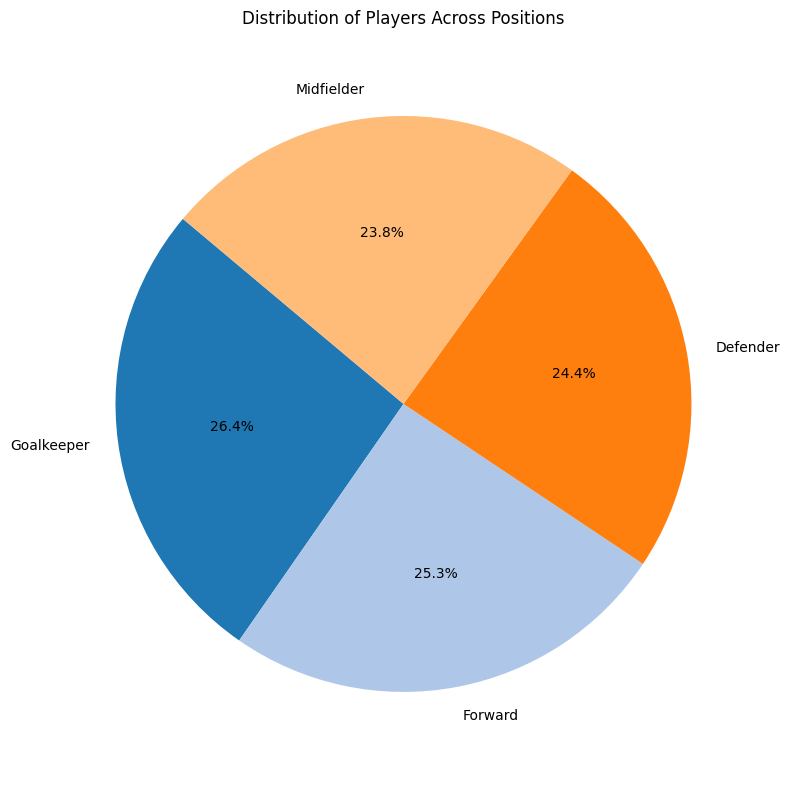

In [11]:
#Visualizing the count of players for each position using bar and pie chart
import matplotlib.pyplot as plt

#Bar Plot
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='black')
plt.title('Count of Players for Each Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Players Across Positions')
plt.axis('equal')  
plt.tight_layout()
plt.show()

Chi-square statistic: 12.823059060327429
P-value: 0.005035302528376228


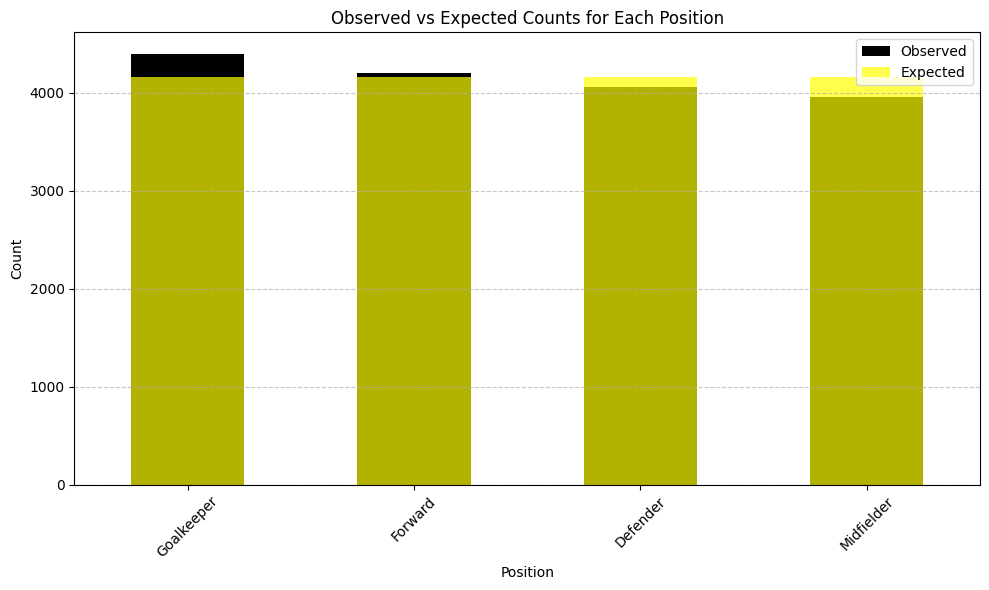

In [12]:
#Additional Complexity
#Performing a Chi-Square Test to validate our findings

#Expected counts assuming a uniform distribution
total_players = observed_counts.sum()
expected_counts = pd.Series(total_players / len(observed_counts), index=observed_counts.index)

#Chi-square test of independence
chi2, p_value = chi2_contingency([observed_counts, expected_counts])[:2]

#Results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

#Observed vs Expected counts
plt.figure(figsize=(10, 6))
observed_counts.plot(kind='bar', color='black', label='Observed')
expected_counts.plot(kind='bar', color='yellow', alpha=0.7, label='Expected')
plt.title('Observed vs Expected Counts for Each Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()